<a href="https://colab.research.google.com/github/Sant18/Sonar/blob/main/Sonar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pypyodbc

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\santa\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [ ]:
import pypyodbc as podbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline

import numpy as np

In [ ]:
conn = podbc.connect('Driver={SQL Server Native Client 11.0};'
                    'Server=BOOK2\MSSQLSERVER01;'
                    'Database=unsuper;'
                    'Trusted_Connection=yes;')

In [ ]:
SQL_Query = pd.read_sql_query('''SELECT * FROM [dbo].[sonar.all-data]''', conn)

In [ ]:
df = SQL_Query

In [ ]:
def d_(data):
    return pd.DataFrame(data)

In [ ]:
d_(df.column61.value_counts())

,column61
M,111
R,97


In [ ]:
def cont(df, col):
    
    fig, ax = plt.subplots(1, 2, figsize=(30, 10))
    
    skew = round(df[col].skew(), 4)
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax[0].text(0.79, 0.95, f'Skew: {skew}', verticalalignment='top', bbox=props, transform=ax[0].transAxes, fontsize=20)
    
    sns.histplot(df[col].values, ax=ax[0])
    
    ax[0].set_title(col, fontsize=30)
    ax[0].set_ylabel('Count', fontsize=20)
    
    stats.probplot(df.loc[:, col], plot=ax[1])
    ax[1].set_title(col, fontsize=30)
    ax[1].set_ylabel('Ordered Values', fontsize=20)
    ax[1].set_xlabel('Theoretical Quantities', fontsize=20)
    

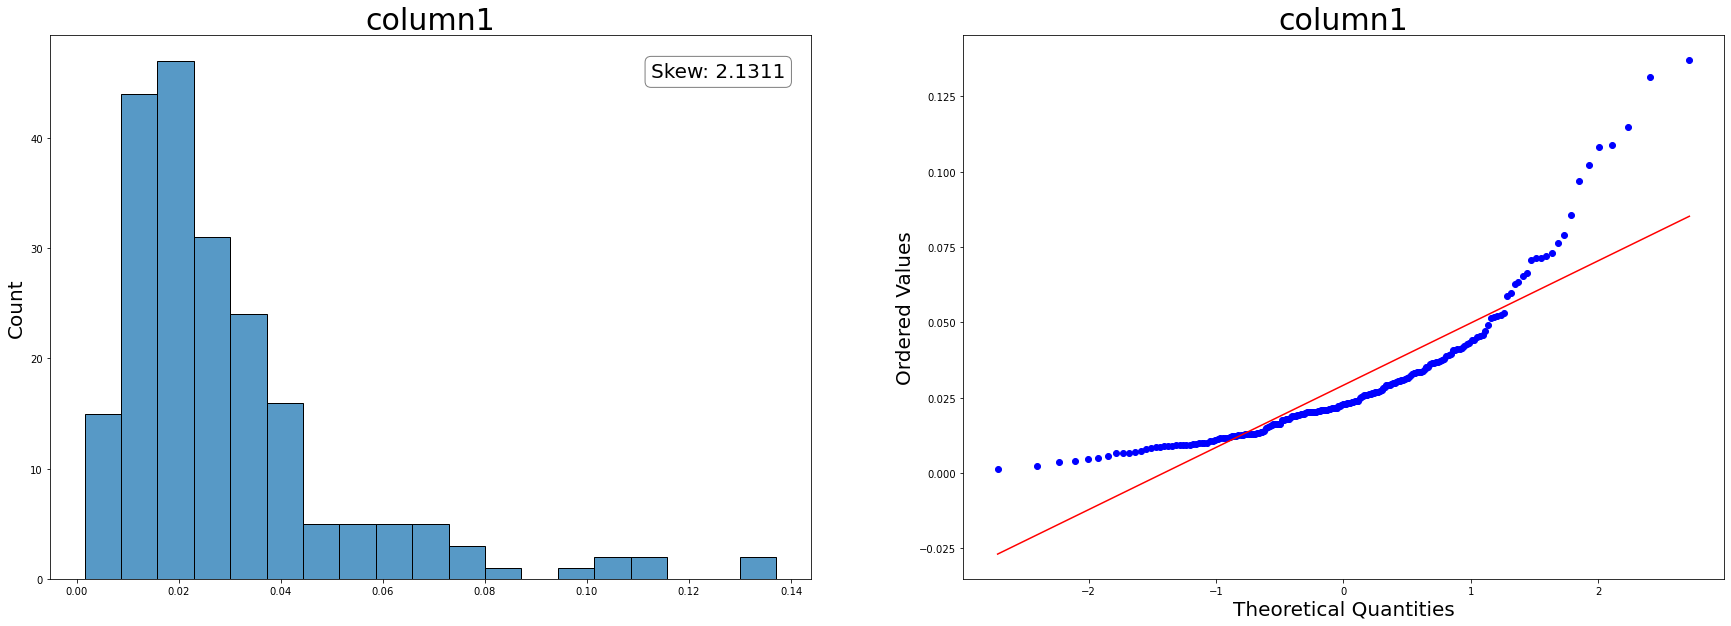

In [ ]:
cont(df, 'column1')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['column61'] = le.fit_transform(df['column61'])

In [ ]:
df['column61'] = df['column61'].astype('int')

In [ ]:
def cs(df=df):
    
    sk = [df[col].skew() for col in df.columns]
    co = [abs(df.corr()[col]['column61']) for col in df.columns]
    col = [col for col in df.columns]
    df_ = zip(col, co, sk)
    df_ = pd.DataFrame(df_)
    df_ = df_.rename(columns={0:'Columns',
                             1:'Corr',
                             2:'Skew'})
    
    return df_.sort_values(by='Corr', ascending=False).reset_index(drop=True)

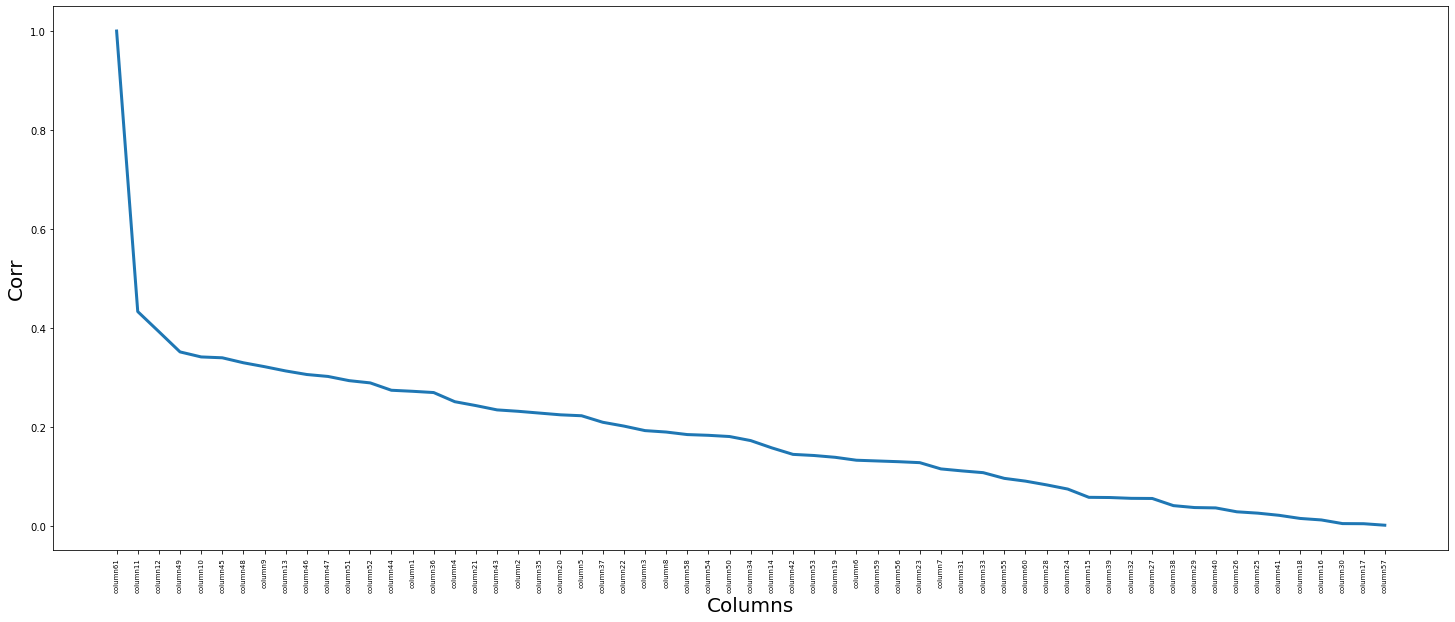

In [ ]:
fig = plt.figure(figsize=(25,10))

x_axis = [col.split('n')[1] for col in df.columns]

sns.lineplot(data=cs(), x='Columns', y='Corr', linewidth=3,
            markers=True)

plt.xlabel('Columns', fontsize=20)
plt.ylabel('Corr', fontsize=20)
plt.xticks(list(df.columns), fontsize=7, rotation=90)
plt.show()

In [ ]:
df_corr = cs()

In [ ]:
col_vals = list(df_corr['Columns'])

In [ ]:
def len_outlier(col, df=df):

    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    
    iqr = q3 - q1
    outlier_step = iqr*1.75
    
    outlier = df[col][~((df[col] >= q1 - outlier_step) & (df[col] <= q3 + outlier_step))].index.tolist()
    
    return len(outlier)

In [ ]:
len_outlier('column60')

6

In [ ]:
def bx_plot(col, df=df, hue=False):
    

    props = dict(boxstyle='round', facecolor='white', alpha=0.5)

        
    if hue:
        
        fig, ax = plt.subplots(figsize=(35, 12))
        sns.boxplot(x=col, data=df, y='column61', orient='h', ax=ax)
        plt.xticks(fontsize=15)
        ax.set_xlabel(col, fontsize=20)
        ax.text(0.72, 0.15, f'Outliers: {len_outlier(col)}', verticalalignment='top', 
                   bbox=props, transform=ax.transAxes, fontsize=25)
        
            
        plt.show()
                                

    else:
        
        fig, ax = plt.subplots(1, figsize=(35, 6))
        sns.boxplot(x=col, data=df, ax=ax)
        plt.xticks(fontsize=15)
        ax.set_xlabel(col, fontsize=20)
        ax.text(0.72, 0.15, f'Outliers: {len_outlier(col)}', verticalalignment='top', 
                   bbox=props, transform=ax.transAxes, fontsize=25)
            
        plt.show()
        
                

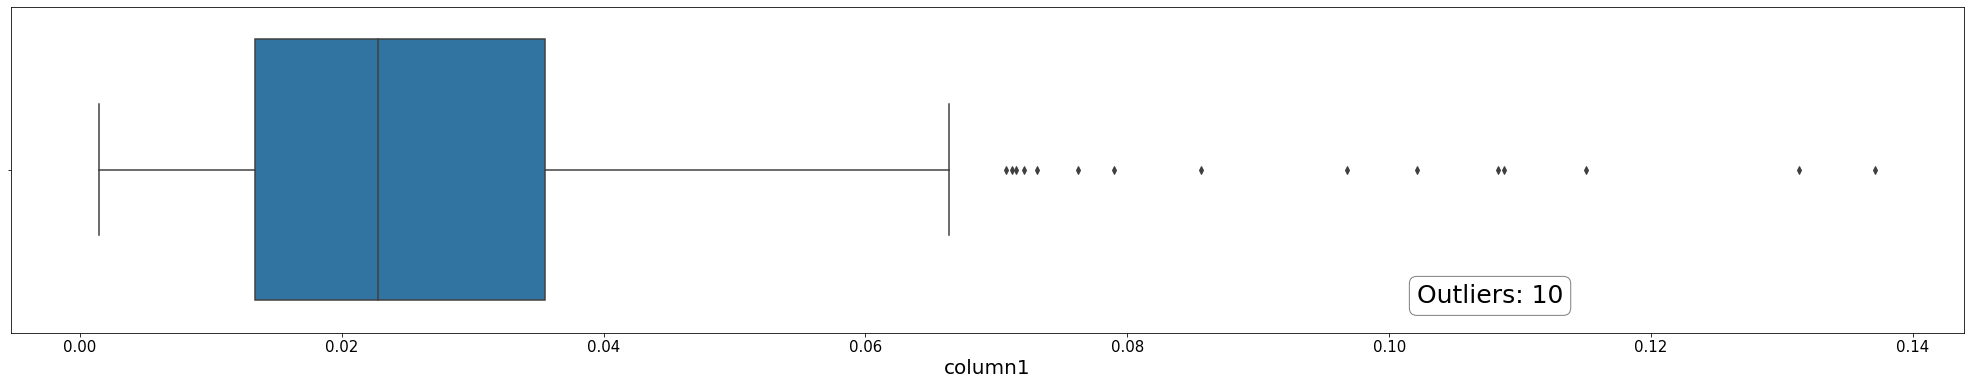

In [ ]:
bx_plot('column1', hue=False)

In [ ]:
def out(drop=False, df=df):
    
    out_val = []
    cols = []
    
    for col in df.columns:
        
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)

        iqr = q3 - q1
        outlier_step = iqr*1.75

        outlier = df[col][~((df[col] >= q1 - outlier_step) & (df[col] <= q3 + outlier_step))].index.tolist()
        
        if not drop:
            
            out_val.append(len(outlier))
            
        if drop:
                           
            df.drop(outlier, inplace=Ture, errors='ignore')
            print(f'{col} ---> outliers removed')
            
    zipped = zip(df.columns, out_val)
    zipped_df = pd.DataFrame(zipped)
    zipped_df = zipped_df.rename(columns={0:'Columns', 1:'Outlier'})
    return zipped_df

In [ ]:
def scat(col, df=df):
    
    fig = plt.figure(figsize=(10, 10))
    
    sns.scatterplot(x=col, y='column10', data=df)
    
    plt.show()

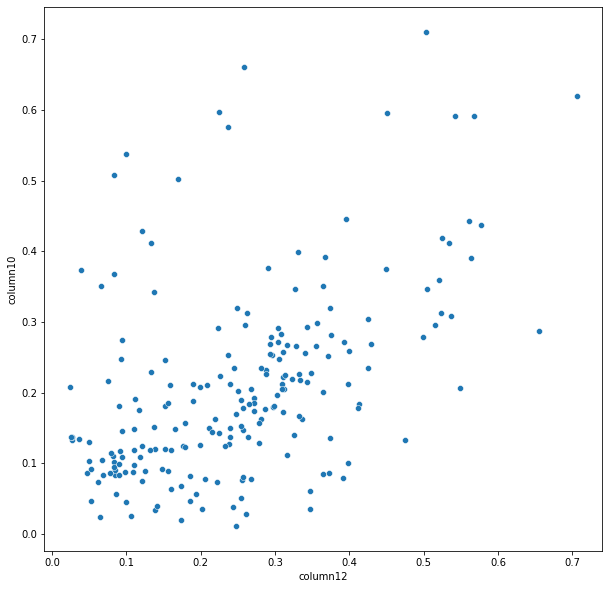

In [ ]:
scat('column12')

In [ ]:
def plot_hp(df):
    
    fig = plt.figure(figsize=(20, 20))
    
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    sns.heatmap(df.corr(), mask=mask)
    
    plt.show()

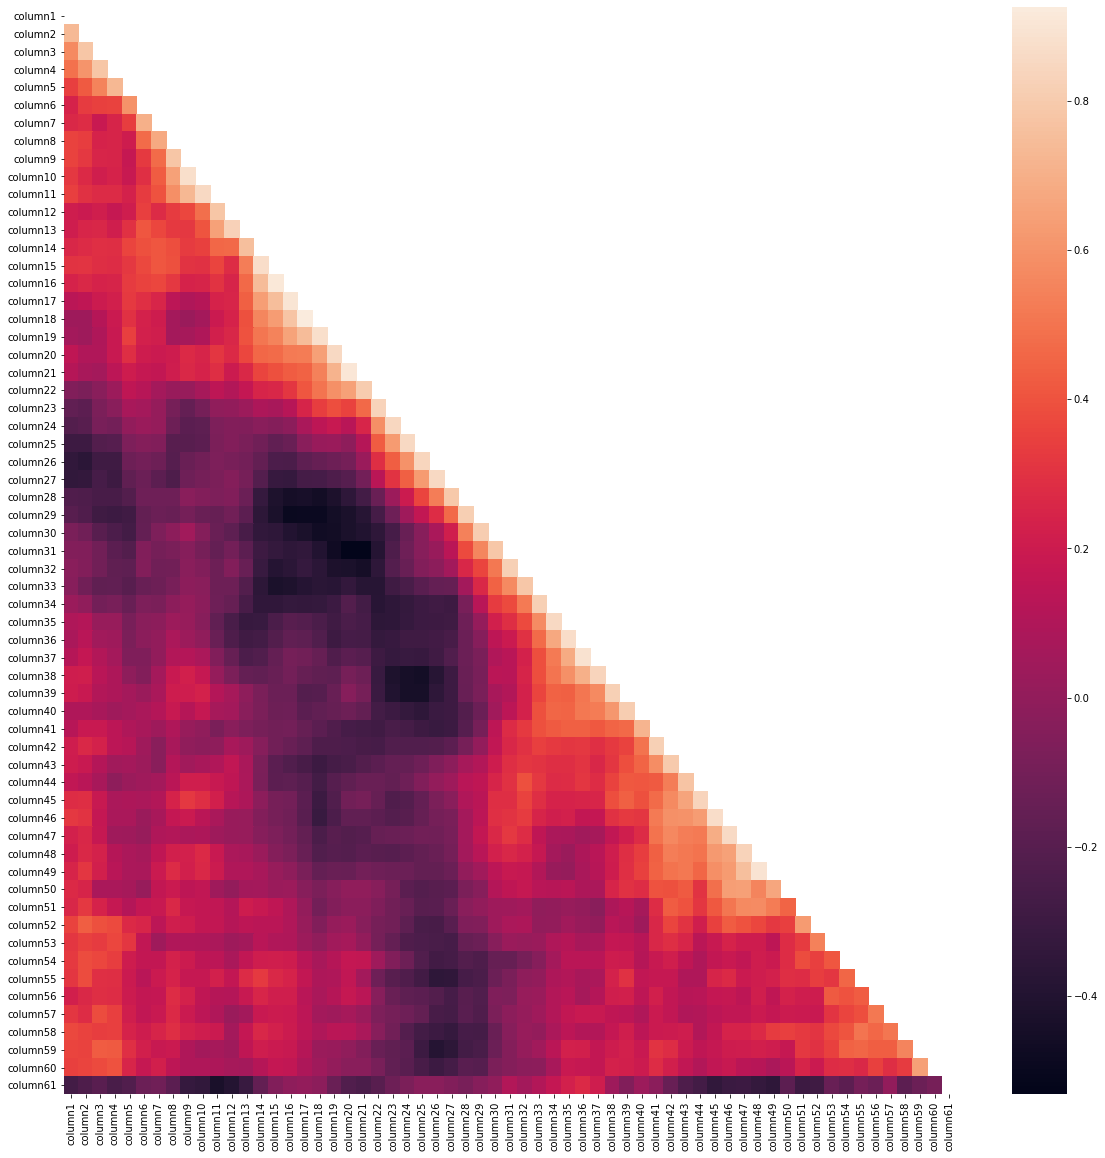

In [ ]:
plot_hp()

In [ ]:
cs()

,Columns,Corr,Skew
0,column61,1.000000,0.135903
1,column11,0.432855,0.987813
2,column12,0.392245,0.588681
3,column49,0.351312,1.273385
4,column10,0.341142,1.281258
5,column45,0.339406,1.366839
6,column48,0.329333,1.277722
7,column9,0.321448,1.633870
8,column13,0.312811,0.736584
9,column46,0.305610,1.706674


In [ ]:
df_norm = df.copy()

In [ ]:
def normalize(df):
    
    for col in df.columns:
        
        if abs(df[col].skew()) > 0.65:
            
            #df[col] = np.log(df[col])
            #df[col] = stats.boxcox(df[col])
            df[col] = np.sqrt(df[col])
            
        else:
            
            continue
            
    return df
    

In [ ]:
df_norm = normalize(df_norm)

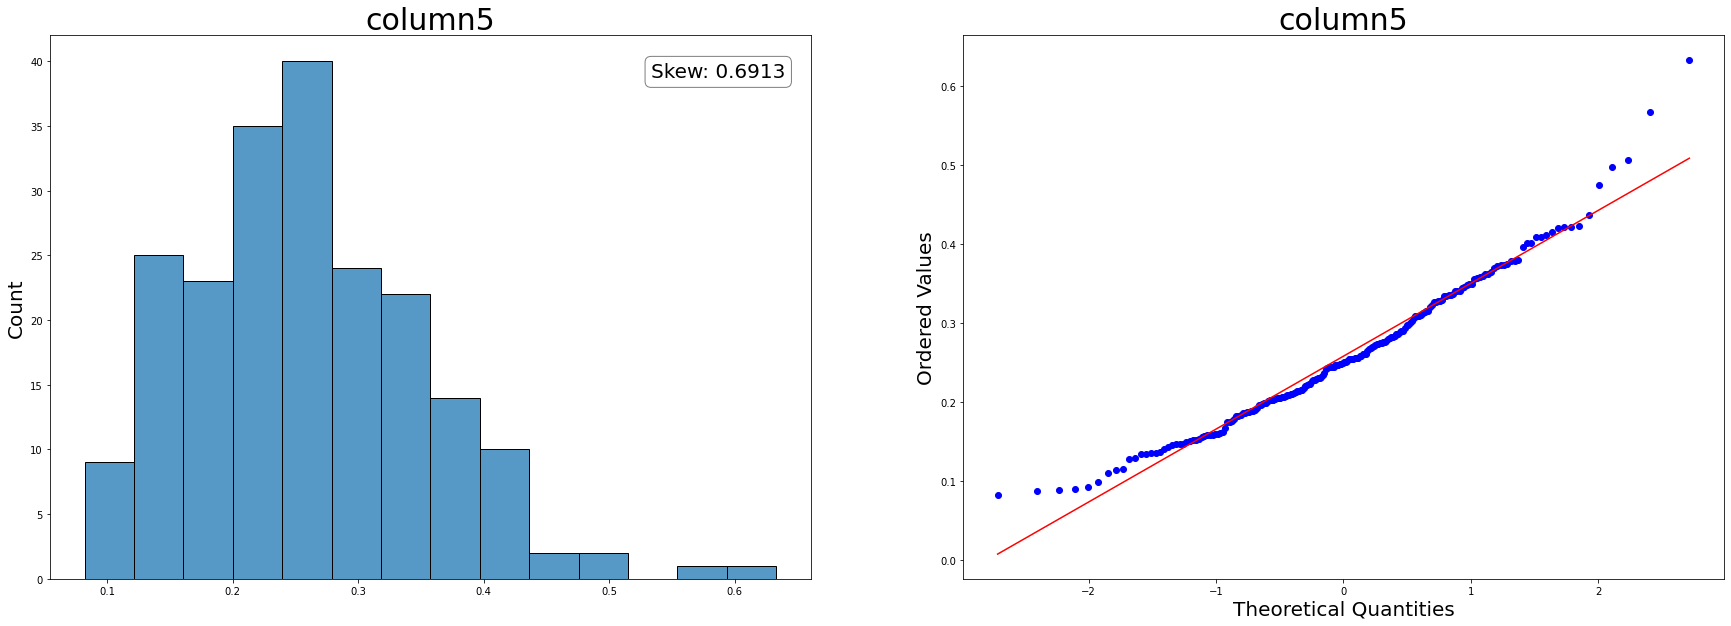

In [ ]:
cont(df_norm, 'column5')

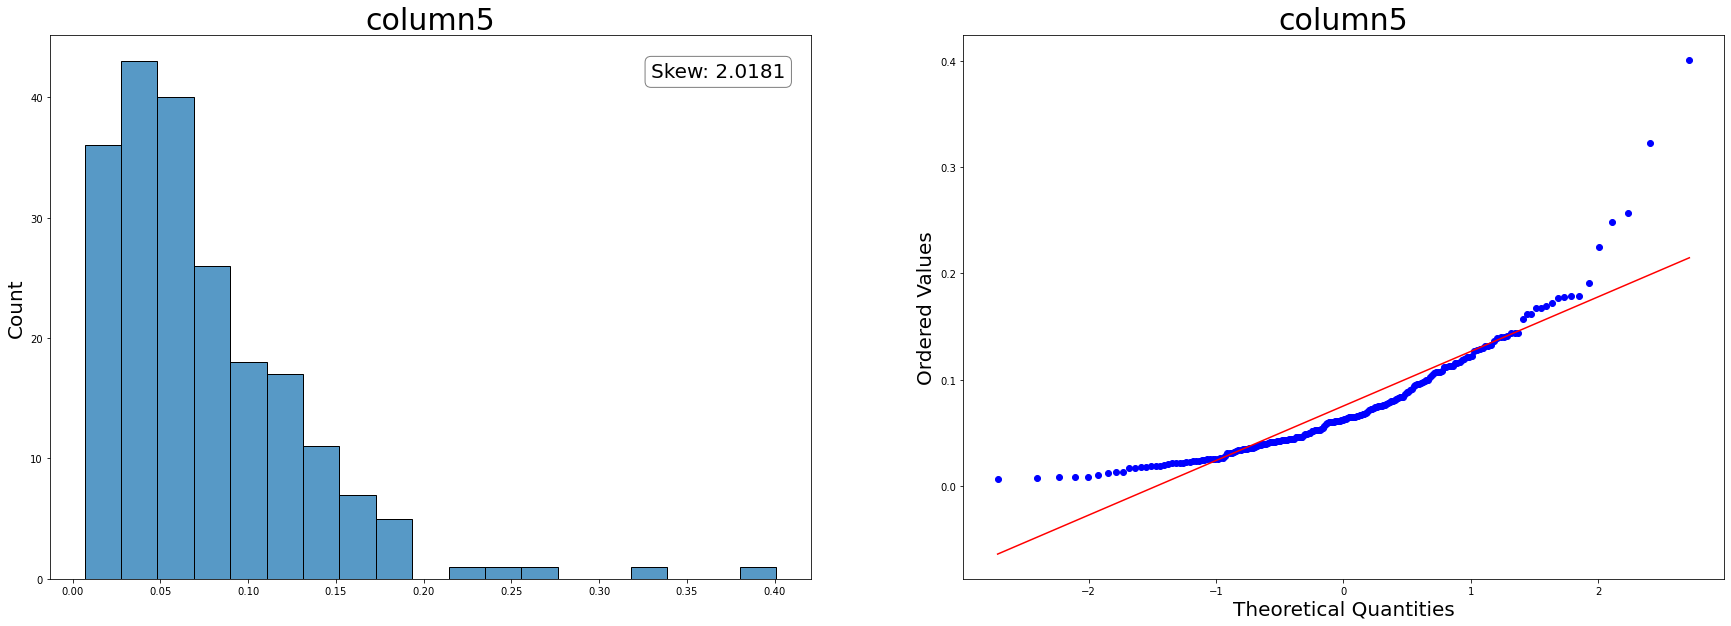

In [ ]:
cont(df, 'column5')

In [ ]:
keep = cs(df_norm)[:46]['Columns'].tolist()

In [ ]:
df_ = df_norm[keep]

In [ ]:
df_.shape

(208, 46)

In [ ]:
def plot_hp_new(df, x):
    
    fig = plt.figure(figsize=(20, 20))
    
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    sns.heatmap(abs(df.corr()) > x, mask=mask, annot=True)
    
    plt.show()

In [ ]:
df_no = df_.drop('column61', axis=1)

In [ ]:
df_.columns

Index(['column61', 'column11', 'column12', 'column49', 'column10', 'column9',
       'column13', 'column45', 'column47', 'column48', 'column51', 'column46',
       'column52', 'column4', 'column1', 'column44', 'column36', 'column5',
       'column43', 'column21', 'column2', 'column35', 'column20', 'column3',
       'column37', 'column8', 'column50', 'column22', 'column58', 'column14',
       'column34', 'column6', 'column42', 'column54', 'column19', 'column7',
       'column53', 'column23', 'column56', 'column31', 'column33', 'column59',
       'column39', 'column15', 'column28', 'column60'],
      dtype='object')

In [ ]:
#dff = df_[['column12', 'column10', 'column9', 'column13','column48', 'column46', 'column44', 'column43', 'column35', 'column37', 'column22', 'column34', 'column42', 'column19', 'column23', 'column33', 'column15']]

In [ ]:
df__ = df_.copy()

In [ ]:
df__ = df__.drop(dff, axis=1)

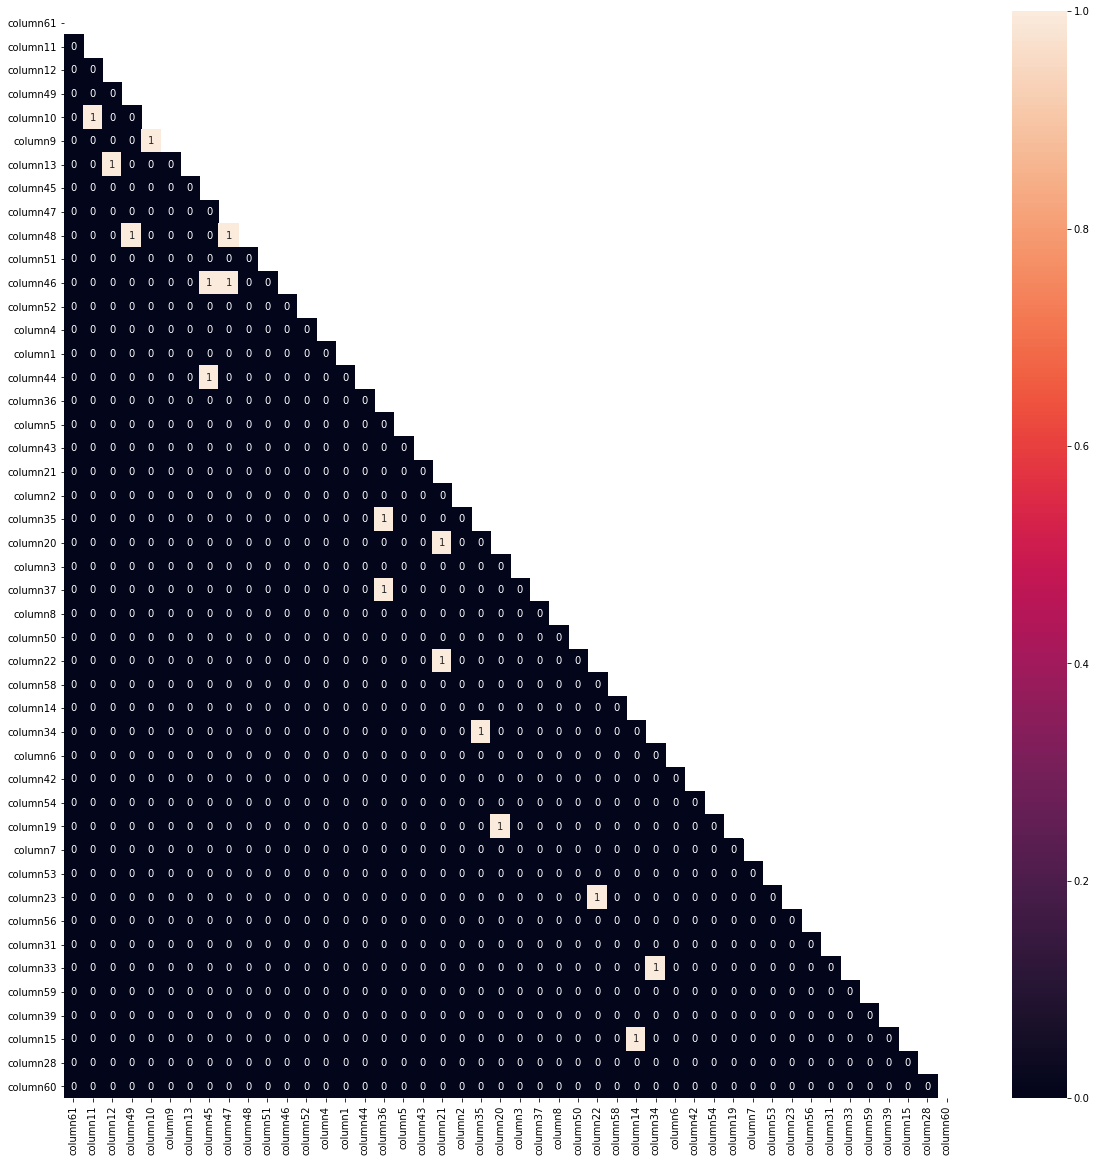

In [ ]:
plot_hp_new(df_, 0.8)

In [ ]:
df__ = df_.drop(['column15', 'column33', 'column23', 'column19', 'column34', 'column21', 'column36', 'column10', 'column13', 'column48', 'column9', 'column45', 'column47'], axis=1) 

In [ ]:
check = pd.concat([cs(df__)['Corr'], cs(df_)['Corr']], axis=1)

In [ ]:
df__

,column61,column11,column12,column49,column51,column46,column52,column4,column1,column44,column5,column43,column2,column35,column20,column3,column37,column8,column50,column22,column58,column14,column6,column42,column54,column7,column53,column56,column31,column59,column39,column28,column60
0,1,0.401123,0.1582,0.195704,0.152315,0.372290,0.051962,0.143875,0.141421,0.652380,0.308869,0.531507,0.192614,0.8537,0.4797,0.206882,0.818046,0.400125,0.180000,0.5071,0.091652,0.253969,0.314006,0.532353,0.126095,0.392301,0.080623,0.129228,0.1307,0.094868,0.703065,0.8080,0.056569
1,1,0.701285,0.6552,0.202237,0.111803,0.142478,0.091652,0.262488,0.212838,0.403485,0.343948,0.374299,0.228692,0.1306,0.7818,0.290345,0.619274,0.590000,0.078102,0.4052,0.070000,0.883006,0.508232,0.241454,0.069282,0.464327,0.094340,0.138203,0.3788,0.072111,0.428952,0.2767,0.066332
2,1,0.795801,0.7060,0.114018,0.057446,0.132665,0.152315,0.329090,0.161864,0.471381,0.312090,0.461411,0.241247,0.4232,0.8619,0.331512,0.782049,0.614085,0.102956,0.6737,0.128062,0.729383,0.477493,0.508626,0.097468,0.493052,0.128841,0.156205,0.8512,0.097468,0.733144,0.8533,0.088318
3,1,0.296816,0.1992,0.260960,0.155242,0.604483,0.110000,0.143178,0.100000,0.565862,0.143178,0.566569,0.130767,0.3953,0.3973,0.249600,0.735391,0.357211,0.171464,0.3690,0.066332,0.475500,0.191833,0.707531,0.122474,0.331361,0.060000,0.085440,0.6260,0.063246,0.992824,0.2520,0.108167
4,1,0.644360,0.3952,0.151658,0.124900,0.229783,0.055678,0.198494,0.276043,0.290000,0.242899,0.429767,0.258070,0.1951,0.4636,0.219317,0.678528,0.496689,0.067823,0.4292,0.069282,0.643040,0.254755,0.494368,0.102470,0.347707,0.073485,0.038730,0.5103,0.103441,0.531789,1.0000,0.096954
5,1,0.546626,0.4250,0.162481,0.101980,0.330000,0.067082,0.131909,0.169115,0.351852,0.195959,0.268887,0.212838,0.1407,0.5122,0.166433,0.617009,0.428135,0.090000,0.3985,0.051962,0.905428,0.314643,0.514782,0.061644,0.346554,0.037417,0.094340,0.5580,0.071414,0.636710,0.3750,0.078740
6,1,0.422611,0.0658,0.225167,0.139642,0.244336,0.141774,0.375233,0.178045,0.418210,0.409145,0.442380,0.309192,0.2969,0.4233,0.363456,0.784411,0.374299,0.126095,0.9735,0.119583,0.612536,0.413521,0.487545,0.114455,0.270370,0.157480,0.117473,0.5811,0.060000,0.740203,0.5429,0.101489
7,1,0.529339,0.3086,0.168819,0.072111,0.485798,0.090000,0.178606,0.227816,0.379078,0.340294,0.433474,0.234094,0.3666,0.9402,0.290172,0.437607,0.247588,0.133417,0.5352,0.068557,0.616523,0.303645,0.468615,0.067082,0.320468,0.109545,0.098489,0.1318,0.069282,0.654828,0.6091,0.072801
8,1,0.340000,0.1654,0.278747,0.078102,0.356511,0.120416,0.217945,0.149332,0.331512,0.254362,0.460543,0.193649,0.3408,0.9925,0.220000,0.496286,0.098995,0.209523,0.8890,0.096437,0.599833,0.243105,0.417133,0.120416,0.274408,0.113137,0.070000,0.3007,0.076811,0.409878,0.7353,0.046904
9,1,0.283019,0.1056,0.095917,0.108628,0.262298,0.094868,0.083666,0.128062,0.372022,0.136748,0.399625,0.131529,0.0244,0.4333,0.186279,0.399249,0.264008,0.140712,0.7652,0.059161,0.298329,0.259037,0.376962,0.133791,0.324962,0.149332,0.082462,0.5829,0.074833,0.263818,0.8907,0.063246


In [ ]:
dfff = df.drop('column61', axis=1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_pipeline = Pipeline(steps=[
                               
                               ('poly', PolynomialFeatures(degree=2))        
                               
                               ])

p = poly_pipeline.fit_transform(dfff) 

In [ ]:
dfff = pd.DataFrame(p)

In [ ]:
df_p = pd.concat([dfff, df[['column61']]], axis=1)

In [ ]:
#cs(df_p).head(50)

In [ ]:
df_p[[703, 652, 654, 702, 'column61']].corr()

,703,652,654,702,column61
703,1.000000,0.692837,0.860616,0.920852,-0.456795
652,0.692837,1.000000,0.762747,0.771475,-0.449154
654,0.860616,0.762747,1.000000,0.800633,-0.443308
702,0.920852,0.771475,0.800633,1.000000,-0.437652
column61,-0.456795,-0.449154,-0.443308,-0.437652,1.000000


In [ ]:
dfff.shape

(208, 1891)

In [ ]:
cs(df)

,Columns,Corr,Skew
0,column61,1.000000,0.135903
1,column11,0.432855,0.987813
2,column12,0.392245,0.588681
3,column49,0.351312,1.273385
4,column10,0.341142,1.281258
5,column45,0.339406,1.366839
6,column48,0.329333,1.277722
7,column9,0.321448,1.633870
8,column13,0.312811,0.736584
9,column46,0.305610,1.706674


In [ ]:
df__.columns

Index(['column61', 'column11', 'column12', 'column49', 'column51', 'column46',
       'column52', 'column4', 'column1', 'column44', 'column5', 'column43',
       'column2', 'column35', 'column20', 'column3', 'column37', 'column8',
       'column50', 'column22', 'column58', 'column14', 'column6', 'column42',
       'column54', 'column7', 'column53', 'column56', 'column31', 'column59',
       'column39', 'column28', 'column60'],
      dtype='object')

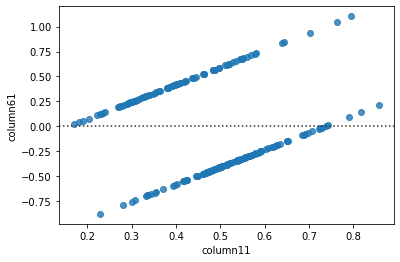

In [ ]:
sns.residplot(x = 'column11', y = 'column61', data=df__)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df__.drop('column61', axis=1), df__['column61'], test_size=0.33,
                                                   random_state=42)

In [ ]:
X_train_og, X_test_og, y_train_og, y_test_og = train_test_split(df.drop('column61', axis=1), df['column61'], test_size=0.33,
                                                   random_state=42)

In [ ]:
X_traino, X_testo, y_traino, y_testo = train_test_split(df_norm.drop('column61', axis=1), df_norm['column61'], test_size=0.33,
                                                   random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC 
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost.sklearn import XGBClassifier

In [ ]:
estimator_dict = {
    
    'Random_Forest': RandomForestClassifier(),
    
    'Gradient_Boost': GradientBoostingClassifier(),

    'SGD': SGDClassifier(),
    
    'Log_Reg': LogisticRegression(),
    
    'SVC': SVC(),
    
    'Linear_SVC': LinearSVC(),

}

In [ ]:
def train(X, y):
  score_CV_ = []
  est_ = []
  acc_ = []
  for i, est in estimator_dict.items():
    print(f"PENDING>>>>>>>")
    est.fit(X, y)
    score_CV = cross_val_score(est, X, y, cv=3, scoring='accuracy')
    est_.append(i)
    score_CV_mean = score_CV.mean()
    score_CV_.append(score_CV_mean)
    y_pred = est.predict(X)
    acc = accuracy_score(y, y_pred)
    acc_.append(round(acc, 3))
    print(f"{est} COMPLETE\n")

  zipped = zip(est_, acc_, score_CV_)
  zipped_df = pd.DataFrame(zipped, columns = ['Estimator', 'Acc', 'Acc_CV']).sort_values(by='Acc', ascending=False)
  display(zipped_df)

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
train(X_train_og, y_train_og)

PENDING>>>>>>>
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) COMPLETE

PENDING>>>>>>>
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fracti

,Estimator,Acc,Acc_CV
0,Random_Forest,1.000,0.827012
1,Gradient_Boost,1.000,0.798643
4,SVC,0.871,0.748535
2,SGD,0.863,0.726642
5,Linear_SVC,0.863,0.784459
3,Log_Reg,0.827,0.755473


In [ ]:
pipe = Pipeline([
    
    ('classifier', RandomForestClassifier())
    
])

In [ ]:
rf = RandomForestClassifier()

In [ ]:
search_rf = {
    
    'max_depth': list(range(1, 15)),
    'n_estimators': list(range(1, 50, 5))
    
    }

In [ ]:
def grid_search(clf, search, X, y):
    clf_grid = GridSearchCV(clf, param_grid=search, cv=3, scoring='accuracy', n_jobs=-1)
    clf_grid_fit = clf_grid.fit(X, y)
    #print(clf.best_params_)
    return clf_grid_fit.best_estimator_ 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model = grid_search(rf, search_rf, X_train_og, y_train_og)

In [ ]:
def score(clf):
  y_pred = clf.predict(X_train_og)
  s = accuracy_score(y_train_og, y_pred)
  s = (s*100)
  s = round(s, 2)
  print(f'Acc on train: {s}%')
  Y_pred = clf.predict(X_test_og)
  s = accuracy_score(y_test_og, Y_pred)
  s = (s*100)
  s = round(s, 2)
  print(f'Acc on val: {s}%')

In [ ]:
score(model)

Acc on train: 100.0%
Acc on val: 84.06%


In [ ]:
X_train.shape

(139, 32)

In [ ]:
X_traino.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13,column14,column15,column16,column17,column18,column19,column20,column21,column22,column23,column24,column25,column26,column27,column28,column29,column30,column31,column32,column33,column34,column35,column36,column37,column38,column39,column40,column41,column42,column43,column44,column45,column46,column47,column48,column49,column50,column51,column52,column53,column54,column55,column56,column57,column58,column59,column60
28,0.100000,0.165831,0.137840,0.192614,0.203961,0.141774,0.177200,0.255147,0.435431,0.516527,0.581034,0.3282,0.493153,0.356090,0.357491,0.666408,0.824318,0.7051,0.7966,0.9401,0.9857,0.8193,0.5789,0.799625,0.839226,0.829156,0.4081,0.1811,0.2064,0.3917,0.3791,0.2042,0.2227,0.3341,0.3984,0.5077,0.743909,0.578965,0.521824,0.477284,0.452106,0.445646,0.288964,0.301330,0.371484,0.441362,0.347994,0.290345,0.242693,0.157162,0.108628,0.093808,0.101980,0.060000,0.093808,0.068557,0.108167,0.044721,0.095394,0.076158
42,0.145258,0.178606,0.203715,0.169115,0.110000,0.209284,0.360416,0.372827,0.263629,0.238328,0.294788,0.1935,0.384448,0.432551,0.446542,0.572975,0.828312,0.5814,0.2500,0.1734,0.3363,0.5588,0.6592,0.837377,0.899944,0.943451,0.8745,0.7887,0.8725,0.9376,0.8920,0.7508,0.6832,0.7610,0.9017,1.0000,0.955144,0.859535,0.769090,0.636946,0.549454,0.482804,0.541387,0.479375,0.488979,0.437035,0.331059,0.173205,0.130767,0.195704,0.072801,0.094868,0.064807,0.123693,0.102956,0.044721,0.102470,0.070000,0.083666,0.089443
79,0.103923,0.092736,0.076158,0.214476,0.274226,0.297825,0.318591,0.222261,0.217256,0.198242,0.332566,0.1412,0.469255,0.545527,0.641561,0.689493,0.734166,0.6279,0.7060,0.7918,0.9493,1.0000,0.9645,0.971185,0.930484,0.888538,0.6501,0.4492,0.4739,0.6153,0.4929,0.3195,0.3735,0.3336,0.1052,0.0671,0.194679,0.214709,0.411582,0.465725,0.409512,0.253772,0.126095,0.278927,0.255539,0.144914,0.225610,0.196723,0.161864,0.100499,0.126886,0.053852,0.088318,0.106771,0.091104,0.076158,0.017321,0.047958,0.050990,0.051962
97,0.221585,0.167033,0.243311,0.356371,0.420951,0.436807,0.470850,0.277128,0.352987,0.450333,0.307734,0.2497,0.470000,0.565243,0.577927,0.576455,0.527257,0.2975,0.2948,0.1729,0.3264,0.3834,0.3523,0.735527,0.723049,0.668954,0.5340,0.5323,0.3907,0.3456,0.4091,0.4639,0.5580,0.5727,0.6355,0.7563,0.830843,0.785875,0.733417,0.749800,0.806722,0.692604,0.611228,0.529528,0.445197,0.493761,0.422966,0.413038,0.276043,0.154272,0.163707,0.090000,0.113578,0.126886,0.079373,0.109087,0.139284,0.118322,0.182209,0.209523
142,0.229347,0.237276,0.349142,0.347275,0.156844,0.319687,0.232164,0.209523,0.478644,0.403980,0.504381,0.2807,0.548726,0.579741,0.549909,0.478017,0.539444,0.1316,0.1151,0.3404,0.5562,0.6379,0.6553,0.859302,0.808332,0.736410,0.6877,0.7325,0.7726,0.8229,0.8787,0.9108,0.6705,0.6092,0.7505,0.4775,0.408167,0.612291,0.614492,0.458912,0.767203,0.750200,0.507642,0.724224,0.784156,0.715751,0.581808,0.387169,0.233666,0.164317,0.194936,0.184120,0.122066,0.183030,0.193907,0.131909,0.114891,0.101489,0.190788,0.144222
